# Lineare Modelle

## Lineare Regression mit einem Feature

### Datensatz erzeugen

In [75]:
from sklearn.datasets import make_regression

In [76]:
x, y = make_regression(n_samples=200, n_features=1, noise=15)

### Datensatz explorieren

In [77]:
x.shape

(200, 1)

In [78]:
y.shape

(200,)

In [79]:
import matplotlib.pyplot as plt

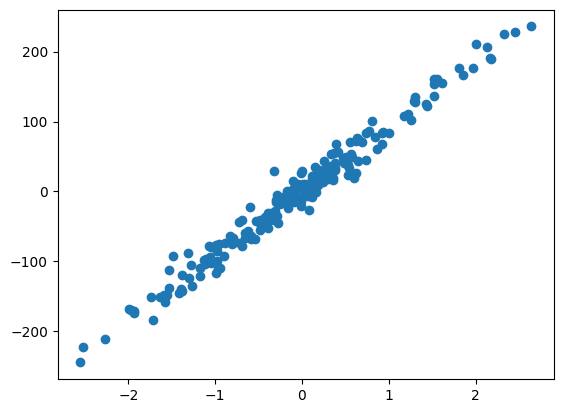

In [80]:
plt.scatter(x, y)

### Trainings- und Testdaten splitten

In [81]:
x_train = x[:150]
x_test = x[150:]

In [82]:
y_train = y[:150]
y_test = y[150:]

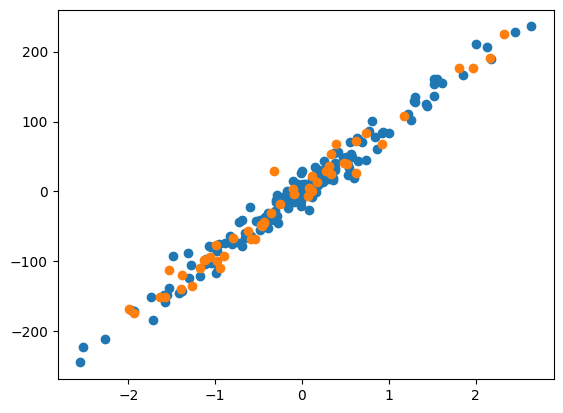

In [83]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

### Lineares Modell fitten

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
model = LinearRegression()

In [86]:
model.fit(x_train, y_train)

LinearRegression()

$y = a * x + b$

In [87]:
model.coef_

array([92.20943202])

In [88]:
model.intercept_

1.5528992064543665

### Fit qualitativ untersuchen

In [89]:
y_pred_train = model.predict(x_train)

In [90]:
y_pred_train.shape

(150,)

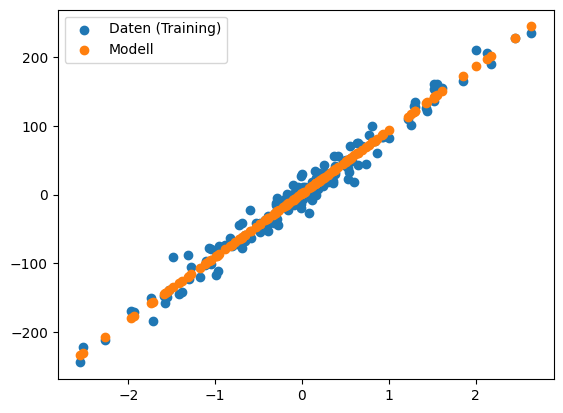

In [91]:
plt.scatter(x_train, y_train, label="Daten (Training)")
plt.scatter(x_train, y_pred_train, label="Modell")
plt.legend()

In [92]:
y_pred_test = model.predict(x_test)

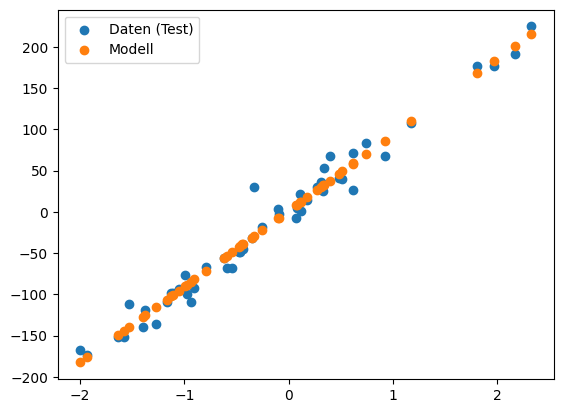

In [93]:
plt.scatter(x_test, y_test, label="Daten (Test)")
plt.scatter(x_test, y_pred_test, label="Modell")
plt.legend()

### Fit quantitativ untersuchen

Mean Squared Error: $\text{MSE}(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2.$

Determinationskoffizient: $R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

In [94]:
from sklearn.metrics import mean_squared_error

In [95]:
mean_squared_error(y_train, y_pred_train)

196.60805858551603

In [96]:
mean_squared_error(y_test, y_pred_test)

223.82641745256785

In [97]:
mean_squared_error(y_test, y_test)

0.0

In [98]:
from sklearn.metrics import r2_score

In [99]:
r2_score(y_train, y_pred_train)

0.9760506924101515

In [100]:
r2_score(y_test, y_pred_test)

0.9750471596130471

In [101]:
r2_score(y_test, y_test)

1.0

In [102]:
model.score(x_test, y_test)

0.9750471596130471

## Lineare Regression mit mehreren Features

In [103]:
x, y = make_regression(n_samples=200, n_features=5, noise=15)

**Aufgabe:**

1) Lineare Regression an die Daten fitten
2) Koeffizienten ansehen
3) Quantitativ die Güte des Fits für die Trainings- und die Testdaten prüfen

In [104]:
x.shape

(200, 5)

IndexError: index 1 is out of bounds for axis 1 with size 1

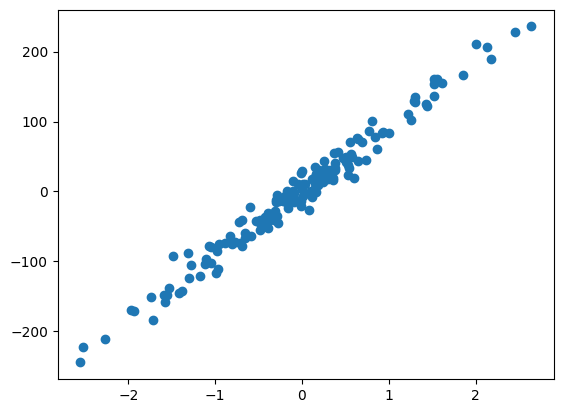

In [105]:
for i in range(x.shape[1]):
    plt.scatter(x_train[:,i], y_train)

In [ ]:
x_train = x[:150]
x_test = x[150:]
y_train = y[:150]
y_test = y[150:]

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
model = LinearRegression()

In [106]:
model.fit(x_train, y_train)

LinearRegression()

$y = (a_0 \cdot x_0 + ... + a_5 \cdot x_5) + b$

In [107]:
model.coef_

array([92.20943202])

In [108]:
model.intercept_

1.5528992064543665

In [109]:
model.score(x_train, y_train)

0.9760506924101515

In [110]:
model.score(x_test, y_test)

0.9750471596130471

In [111]:
mean_squared_error(y_train, model.predict(x_train))

196.60805858551603

In [112]:
mean_squared_error(y_test, model.predict(x_test))

223.82641745256785

## Lineare Regression mit polynomialen Features

In [113]:
import numpy as np

In [114]:
rng = np.random.default_rng()

In [115]:
x1 = np.arange(-1, 2, 0.05)
x2 = np.arange(-1, 2, 0.05)
plot_x, plot_y = np.meshgrid(x1, x2)

In [116]:
noise = 0.2
plot_z = (plot_x + plot_y + noise * (rng.random(plot_x.shape[0]) - 0.5))**2 

In [117]:
plot_z.shape

(60, 60)

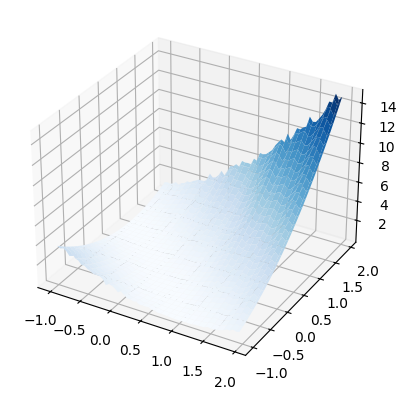

In [118]:
import matplotlib.pyplot as plt
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(plot_x, plot_y, plot_z, vmin=plot_z.min() * 2, cmap=cm.Blues)
plt.show()

### Datensatz erstellen

In [119]:
x = 5 * (rng.random((1000, 2)) - 0.5)
y = (x[:,0] + x[:,1] + noise * (rng.random(x.shape[0]) - 0.5))**2

Text(0, 0.5, 'target')

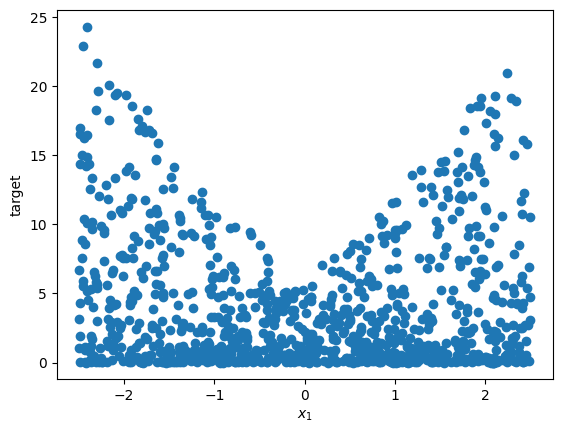

In [120]:
plt.scatter(x[:,0], y)
plt.xlabel("$x_1$")
plt.ylabel("target")

Text(0, 0.5, 'target')

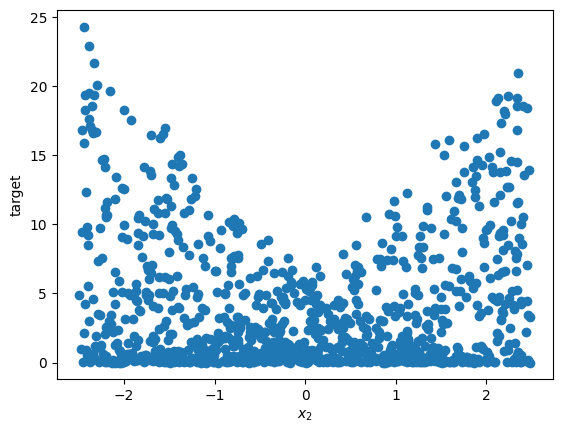

In [121]:
plt.scatter(x[:,1], y)
plt.xlabel("$x_2$")
plt.ylabel("target")

### Lineares Modell fitten

**Aufgabe:**

1) Datensatz in Trainings- und Testdaten unterteilen (80:20-Split)

In [122]:
x_train = x[:800]
x_test = x[800:]
y_train = y[:800]
y_test = y[800:]

2) Lineare Regression an die Daten fitten

In [123]:
model = LinearRegression()

In [124]:
model.fit(x_train, y_train)

LinearRegression()

3) Vorhersage für die Testdaten mit den realen Testdaten vergleichen (je ein Plot pro Dimension)

Text(0, 0.5, 'target')

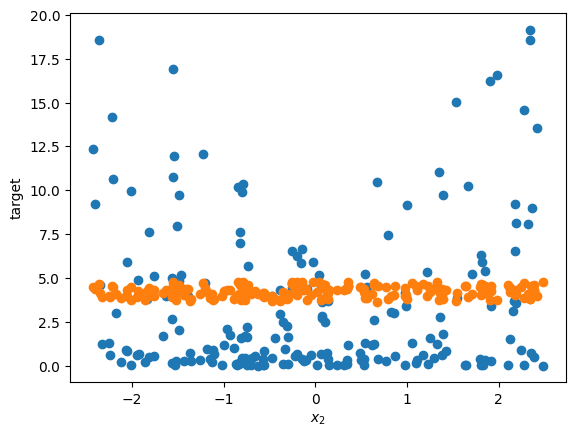

In [125]:
plt.scatter(x_test[:,1], y_test)
plt.scatter(x_test[:,1], model.predict(x_test))
plt.xlabel("$x_2$")
plt.ylabel("target")

4) Was lässt sich anhand der Plots erkennen?

### Polynomiale Features erzeugen

Transformation: $(x_1, x_2) \rightarrow (1, x_1, x_2, x_1^2, x_1 x_2, x_2^2)$

In [126]:
from sklearn.preprocessing import PolynomialFeatures

In [127]:
poly = PolynomialFeatures(degree=2)

In [128]:
poly.fit(x_train)

PolynomialFeatures()

In [129]:
x_train_poly = poly.transform(x_train)

In [130]:
x_train.shape

(800, 2)

In [131]:
x_train_poly.shape

(800, 6)

In [132]:
x_train[0]

array([-0.15682741,  0.19576113])

In [133]:
x_train_poly[0]

array([ 1.        , -0.15682741,  0.19576113,  0.02459484, -0.03070071,
        0.03832242])

### Lineares Modell fitten

In [134]:
model_poly = LinearRegression(fit_intercept=False)

In [135]:
model_poly.fit(x_train_poly, y_train)

LinearRegression(fit_intercept=False)

In [136]:
model_poly.intercept_

0.0

Transformation: $(x_1, x_2) \rightarrow (1, x_1, x_2, x_1^2, x_1 x_2, x_2^2)$

In [137]:
model_poly.coef_

array([ 0.00218099, -0.00347581, -0.0035075 ,  0.99770431,  1.996694  ,
        1.00149444])

Erinnerung: $(x_1 + x_2)^2 = x_1^2 + 2 x_1 x_2 + x_2^2$

### Fit qualitativ untersuchen

In [138]:
x_test_poly = poly.transform(x_test)

Text(0, 0.5, 'target')

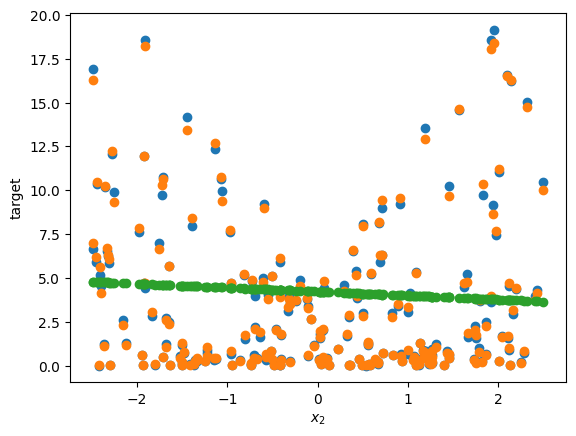

In [139]:
plt.scatter(x_test_poly[:,1], y_test)
plt.scatter(x_test_poly[:,1], model_poly.predict(x_test_poly))
plt.scatter(x_test[:,0], model.predict(x_test))
plt.xlabel("$x_2$")
plt.ylabel("target")

### Fits quantitativ untersuchen

**Aufgabe:**

Für das Modell ohne und das Modell mit polynomialen Features jeweils den MSE und $R^2$ berechnen.


In [140]:
model.score(x_test, y_test)

-0.02386552511321205

In [141]:
model_poly.score(x_test_poly, y_test)

0.9975549754847958

### Vorhersage-Funktion erstellen

**Aufgabe:** Erstelle eine Funktion, die einen zwei-dimensionalen Eingabewert ($x_1$ und $x_2$) nimmt und mit Hilfe des Modells mit polynomialen Features eine Vorhersage für $y$ zurückgibt.

*Beispiel:* `predict(2,2)` $\approx$ 16

In [142]:
x_train[:5]

array([[-0.15682741,  0.19576113],
       [-1.14812874, -2.19285988],
       [ 0.14231872, -1.2633565 ],
       [-1.76280702, -1.63078268],
       [ 0.68168009,  0.50966246]])

$(x_1, x_2) \rightarrow y$

 $(x_1, x_2) \rightarrow \text{poly} \rightarrow (1, x_1, x_2, x_1^2, x_1 x_2, x_2^2) \rightarrow \text{model_poly} \rightarrow y$

In [143]:
import numpy as np

def predict(x1, x2):
    x_input = np.array([[x1, x2]])
    
    x_input = poly.transform(x_input)
    
    return model_poly.predict(x_input)

In [144]:
predict(2, 2)  # = 16

array([15.97178535])

In [145]:
def predict(x_input):
    x_input = poly.transform(x_input)
    return model_poly.predict(x_input)

In [146]:
predict(x_test)

array([3.32088336e-01, 3.83490731e+00, 3.78930613e+00, 3.95069780e-01,
       1.04626823e+01, 8.55516285e-01, 1.65367280e+01, 8.24355335e-01,
       1.12099496e+01, 4.24532589e+00, 7.93901365e-02, 3.50911872e+00,
       6.31755189e+00, 3.51422847e-02, 5.29562594e-01, 2.78820379e+00,
       4.74361578e+00, 1.02828350e+01, 2.02260300e+00, 1.09162858e+00,
       4.41188218e+00, 2.31496924e-02, 3.36528090e+00, 4.70109790e+00,
       2.60589256e-02, 6.17718827e+00, 1.03291787e+01, 1.00254005e-01,
       3.81460451e+00, 2.57777740e-01, 1.68345312e+00, 4.90330342e+00,
       1.47635743e+01, 9.67736895e+00, 5.52741120e-02, 4.14096234e+00,
       1.74118175e+00, 3.16660868e+00, 3.30871751e-02, 4.36857826e-01,
       2.52100575e-01, 2.07021177e+00, 6.01333553e-01, 2.27937952e+00,
       3.94942930e+00, 7.65967193e+00, 5.14736783e+00, 1.19583025e+01,
       2.03745920e+00, 4.66125227e-01, 2.36883470e-01, 4.34780070e-01,
       1.73618430e-01, 7.82813406e+00, 3.31219282e-01, 2.70142470e-01,
      